## Modelos Matemáticos

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime,timedelta
#from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = ('Ecuador_Recovered.csv')
df = pd.read_csv(url,sep=';')
df

,date,date_recovered,total_recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
75,75,103,3536
76,76,0,3536
77,77,0,3536
78,78,0,3536


In [3]:
df = df.loc[:,['date','total_recovered']]
df

,date,total_recovered
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
75,75,3536
76,76,3536
77,77,3536
78,78,3536


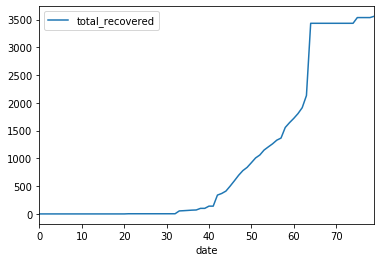

In [4]:
df.plot(x ='date', y='total_recovered')

In [5]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

### Exponencial

In [6]:
c=1

def  exponencial ( x ,  a ,  b ,  c ): 
    return a * np . exp ( - b * x ) + c
exp_fit = curve_fit ( exponencial ,  x ,  y ,  p0 = ( 1 ,  1e-6 ,  1 ))
print(exp_fit)

(array([ 2.00310930e+02, -4.05391794e-02, -4.78384704e+02]), array([[ 3.68195994e+03,  2.28760454e-01, -7.59611116e+03],
       [ 2.28760454e-01,  1.43689282e-05, -4.58448768e-01],
       [-7.59611116e+03, -4.58448768e-01,  1.85050689e+04]]))


Casos en una semana: 6544
Casos en un mes: 16625


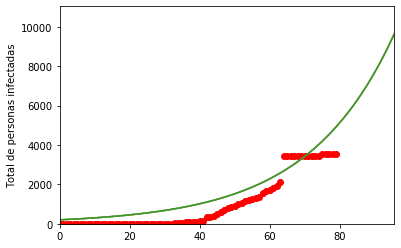

In [58]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

pred_x = list(range(min(x),max(x)+100)) # Predecir 70 dias mas
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [exponencial(i,exp_fit[0][0],exp_fit[0][1],c= ( 1 ,  1e-6 ,  1 )) for i in pred_x], label="Modelo Exponencial" )
plt.ylabel("Total de personas infectadas")
plt.xlim(0, max(x)*1.21)
plt.ylim(0, max(y)*3.1)

casos=pred_x, [exponencial(i,exp_fit[0][0],exp_fit[0][1],c= ( 1 ,  1e-6 ,  1 )) for i in pred_x]
print('Casos en una semana:',int(casos[1][86][0]))
print('Casos en un mes:',int(casos[1][109][0]))

plt.show()

### Polinomial

In [8]:
xp = np.array(range(min(x),max(x)+100))
grado=8
model = LinearRegression()
poly = PolynomialFeatures(degree=grado, include_bias=False)
x_poly = poly.fit_transform(np.array(x).reshape(-1, 1))
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
rl = LinearRegression()
rl.fit(x_poly, y) 
casos = poly.fit_transform(np.array(xp).reshape(-1, 1))
prediccion = rl.predict(casos)
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('w= ',model.coef_,'\nb= ',model.intercept_,'\nRMSE: ' + str(rmse),'\nR2: ' + str(r2))

print ('\nPredicción en una semana:', int(prediccion[89]))
print ('\nPredicción en un mes:', int(prediccion[109]))


w=  [-1.30905943e+02  3.33363992e+01 -3.36820349e+00  1.69730999e-01
 -4.68318409e-03  7.19395206e-05 -5.74658767e-07  1.85473370e-09] 
b=  100.55878657088613 
RMSE: 170.40070469944706 
R2: 0.983863745013255

Predicción en una semana: 12148

Predicción en un mes: 478941


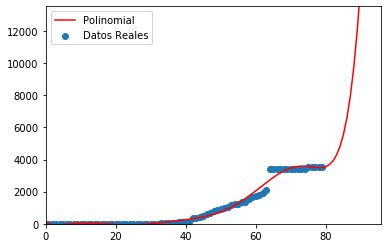

In [9]:
sols = {}
for grado in range(grado,grado+1):
    z = np.polyfit(x, y, grado, full=True)
    sols[grado] = z
    
xp = np.array(range(min(x),max(x)+100))
for grado, sol in sols.items():
    coefs, error, *_ = sol
    p = np.poly1d(coefs)

plt.scatter(x, y,label='Datos Reales')
plt.plot(xp, p(xp), color='r',label='Polinomial')

plt.xlim(0, max(x)*1.21)
plt.ylim(0, max(y)*3.8)
plt.legend()
plt.show()


## Modelo Probabilistico

In [10]:
url = ('Ecuador_Recovered.csv')
datos = pd.read_csv(url,sep=';')

datos = datos.loc[:,['date','date_recovered']]
datos= datos[datos["date_recovered"] > 0.0]
datos

,date,date_recovered
21,21,3
33,33,51
34,34,4
35,35,5
36,36,5
37,37,3
38,38,29
40,40,40
42,42,199
43,43,29


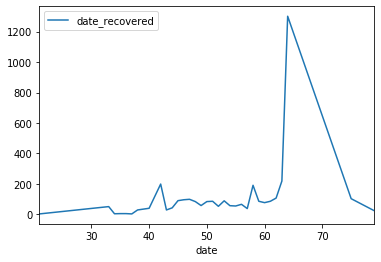

In [11]:
datos.plot(x ='date', y='date_recovered')


In [12]:
datosF=datos['date_recovered']
media = datosF.mean()
mediana = datosF.median()
print('Mediana: ',mediana)
print('Media: ',media)

Mediana:  66.0
Media:  107.87878787878788


In [13]:
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print('Prediccion siguiente:',prediccion_siguiente)

Prediccion siguiente: 3626


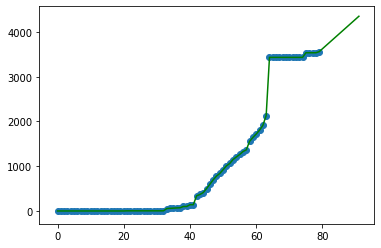

Prediccion en una semana: 4022


In [15]:
xR = list(df.iloc [:, 0]) # Fecha
yR = list(df.iloc [:, 1]) # Numero de casos

# Quiero predecir cuántos "Casos" voy a obtener de aqui a 7 dias.
for i in range(x[-1]+1, x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x, y,color='green')
plt.scatter(xR, yR)

plt.show()
print('Prediccion en una semana:',y[86])

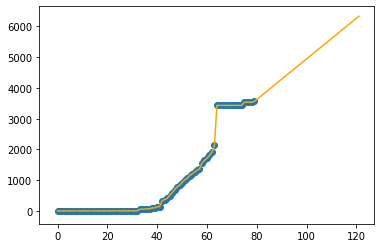

Prediccion en un mes: 5540


In [16]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 31 dias.
for i in range(x[-1]+1, x[-1]+31):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x, y,color='orange')
plt.scatter(xR, yR)

plt.show()
print('Prediccion en un mes:',y[109])

## Simulación

In [67]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

PREDICCION=5540
TASA_CRECIMIENTO=int(media)
DIAS_SIMULACION=210

recuperadas={}
desempleadas={}
reinsercionesAl={}
reinsercionesRe={}
reinsercionesOc={}
reinsercionesVi={}
reinsercionesHo={}


alimentacion={}
retail={}
ocio={}
viaje={}
hotel={}
LABORATORIO=26

class Reinsercion(object):
    def __init__(self,environment,name):
        self.env=environment
        self.labs=name 
        self.labs = simpy.Resource(env,name)
        
    def descanso(self, persona):
        yield self.env.timeout(random.randint(2, 7))
       
    def teletrabajo(self, persona):
        yield self.env.timeout(random.randint(5, 14))
        
    def trabajo(self, persona):
        yield self.env.timeout(random.randint(5, 14))
        
    def valoracion_teletrabajo(self, persona):
        yield self.env.timeout(random.randint(3, 7))
        
    def laboratorios(self, persona):
        yield self.env.timeout(random.randint(5, 15))
        


def llegada_persona(env, reinsercion, persona):
    llegada = env.now
    
    empleo= random.randint(1,100)
    if (empleo<=70):
        ## EMPLEADOS
        tipo_empleo = random.randint(1,5)

        if (tipo_empleo==1):
            ##Alimentacion
            alimentacion[env.now] = alimentacion[env.now] + 1 if env.now in alimentacion else  1
            reinsercion.descanso(persona)
            reinsercion.teletrabajo(persona)
            repetir=True
            while repetir:
                with reinsercion.labs.request() as lab:
                    dias_esperando = random.randint(5,15)
                    requerimientoLabs = yield lab | env.timeout(dias_esperando)
                    wait = env.now - llegada
                    if lab in requerimientoLabs:
                        yield env.process(reinsercion.laboratorios(persona))
                        estado = random.randint(1,100)
                        if (estado <= 70) :
                            reinsercion.trabajo(persona)
                            repetir=False
                            reinsercionesAl[env.now] = reinsercionesAl[env.now] + 1 if env.now in reinsercionesAl else  1
                            recuperadas[env.now] = recuperadas[env.now] + 1 if env.now in recuperadas else  1
                        else:
                            reinsercion.valoracion_teletrabajo(persona)
                            repetir=True
        elif(tipo_empleo==2):
            ##Retail
            retail[env.now] = retail[env.now] + 1 if env.now in retail else  1
            
            alimentacion[env.now] = alimentacion[env.now] + 1 if env.now in alimentacion else  1
            reinsercion.descanso(persona)
            reinsercion.teletrabajo(persona)
            repetir=True
            while repetir:
                with reinsercion.labs.request() as lab:
                    dias_esperando = random.randint(5,15)
                    requerimientoLabs = yield lab | env.timeout(dias_esperando)
                    wait = env.now - llegada
                    if lab in requerimientoLabs:
                        yield env.process(reinsercion.laboratorios(persona))
                        estado = random.randint(1,100)
                        if (estado <= 70) :
                            reinsercion.trabajo(persona)
                            repetir=False
                            reinsercionesRe[env.now] = reinsercionesRe[env.now] + 1 if env.now in reinsercionesRe else  1
                            recuperadas[env.now] = recuperadas[env.now] + 1 if env.now in recuperadas else  1
                        else:
                            reinsercion.valoracion_teletrabajo(persona)
                            repetir=True

        elif(tipo_empleo==3):
            ##Ocio
            ocio[env.now] = ocio[env.now] + 1 if env.now in ocio else  1
            
            alimentacion[env.now] = alimentacion[env.now] + 1 if env.now in alimentacion else  1
            reinsercion.descanso(persona)
            reinsercion.teletrabajo(persona)
            repetir=True
            while repetir:
                with reinsercion.labs.request() as lab:
                    dias_esperando = random.randint(5,15)
                    requerimientoLabs = yield lab | env.timeout(dias_esperando)
                    wait = env.now - llegada
                    if lab in requerimientoLabs:
                        yield env.process(reinsercion.laboratorios(persona))
                        estado = random.randint(1,100)
                        if (estado <= 70) :
                            reinsercion.trabajo(persona)
                            repetir=False
                            reinsercionesOc[env.now] = reinsercionesOc[env.now] + 1 if env.now in reinsercionesOc else  1
                            recuperadas[env.now] = recuperadas[env.now] + 1 if env.now in recuperadas else  1
                        else:
                            reinsercion.valoracion_teletrabajo(persona)
                            repetir=True

        elif(tipo_empleo==4):
            ##Viaje
            viaje[env.now] = viaje[env.now] + 1 if env.now in viaje else  1
                
            alimentacion[env.now] = alimentacion[env.now] + 1 if env.now in alimentacion else  1
            reinsercion.descanso(persona)
            reinsercion.teletrabajo(persona)
            repetir=True
            while repetir:
                with reinsercion.labs.request() as lab:
                    dias_esperando = random.randint(5,15)
                    requerimientoLabs = yield lab | env.timeout(dias_esperando)
                    wait = env.now - llegada
                    if lab in requerimientoLabs:
                        yield env.process(reinsercion.laboratorios(persona))
                        estado = random.randint(1,100)
                        if (estado <= 70) :
                            reinsercion.trabajo(persona)
                            repetir=False
                            reinsercionesVi[env.now] = reinsercionesVi[env.now] + 1 if env.now in reinsercionesVi else  1
                            recuperadas[env.now] = recuperadas[env.now] + 1 if env.now in recuperadas else  1
                        else:
                            reinsercion.valoracion_teletrabajo(persona)
                            repetir=True

        else:
            ##Hoteles
            hotel[env.now] = hotel[env.now] + 1 if env.now in hotel else  1
            
            alimentacion[env.now] = alimentacion[env.now] + 1 if env.now in alimentacion else  1
            reinsercion.descanso(persona)
            reinsercion.teletrabajo(persona)
            repetir=True
            while repetir:
                with reinsercion.labs.request() as lab:
                    dias_esperando = random.randint(5,15)
                    requerimientoLabs = yield lab | env.timeout(dias_esperando)
                    wait = env.now - llegada
                    if lab in requerimientoLabs:
                        yield env.process(reinsercion.laboratorios(persona))
                        estado = random.randint(1,100)
                        if (estado <= 70) :
                            reinsercion.trabajo(persona)
                            repetir=False
                            reinsercionesHo[env.now] = reinsercionesHo[env.now] + 1 if env.now in reinsercionesHo else  1
                            recuperadas[env.now] = recuperadas[env.now] + 1 if env.now in recuperadas else  1
                        else:
                            reinsercion.valoracion_teletrabajo(persona)
                            repetir=True


    else:
        ## DESEMPLEADOS
        desempleadas[env.now] = desempleadas[env.now] + 1 if env.now in desempleadas else  1

        
def ejecutar(env, tasa_crecimiento,prediccion):
    reinsercion = Reinsercion(env,LABORATORIO)
    for i in range(prediccion):
        asignar_reinsercion(env, reinsercion, i)
    persona = prediccion
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            persona += 1
            asignar_reinsercion(env, reinsercion, persona)
            
def asignar_reinsercion(env, reinsercion, persona):
    reinsercion_existente = 1
    if (reinsercion_existente == 1):
        env.process(llegada_persona(env, reinsercion, persona))
        
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, PREDICCION))
env.run(until=DIAS_SIMULACION)

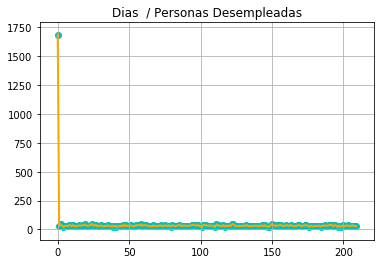

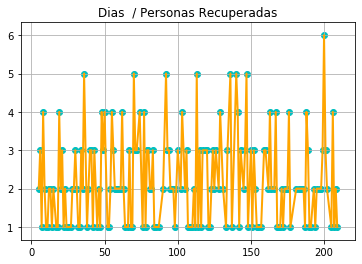

In [77]:
aux=0

alimentacionJ=[]
retailJ=[]
ocioJ=[]
viajeJ=[]
hotelJ=[]

alimentacionJu=[]
retailJu=[]
ocioJu=[]
viajeJu=[]
hotelJu=[]

alimentacionA=[]
retailA=[]
ocioA=[]
viajeA=[]
hotelA=[]

alimentacionS=[]
retailS=[]
ocioS=[]
viajeS=[]
hotelS=[]

alimentacionO=[]
retailO=[]
ocioO=[]
viajeO=[]
hotelO=[]

alimentacionN=[]
retailN=[]
ocioN=[]
viajeN=[]
hotelN=[]

alimentacionD=[]
retailD=[]
ocioD=[]
viajeD=[]
hotelD=[]

for i in reinsercionesAl.values():
    if (aux>=0 and aux<30):
        alimentacionJ.append(i)

    elif (aux>=30 and aux<60):
        alimentacionJu.append(i)

    elif (aux>=60 and aux<90):
        alimentacionA.append(i)        
    
    elif (aux>=90 and aux<120):
        alimentacionS.append(i)

    elif (aux>=120 and aux<150):
        alimentacionO.append(i)
    
    elif (aux>=150 and aux<180):
        alimentacionN.append(i)
    else:
        alimentacionD.append(i)

    aux+=1
    
aux=0
for i in reinsercionesRe.values():
    if (aux>=0 and aux<30):
        retailJ.append(i)

    elif (aux>=30 and aux<60):
        retailJu.append(i)

    elif (aux>=60 and aux<90):
        retailA.append(i)
    
    elif (aux>=90 and aux<120):
        retailS.append(i)

    elif (aux>=120 and aux<150):
        retailO.append(i)
    
    elif (aux>=150 and aux<180):
        retailN.append(i)
    
    else:
        retailD.append(i)
    aux+=1


aux=0    
for i in reinsercionesOc.values():
    if (aux>=0 and aux<30):
        ocioJ.append(i)

    elif (aux>=30 and aux<60):
        ocioJu.append(i)

    elif (aux>=60 and aux<90):
        ocioA.append(i)
    
    elif (aux>=90 and aux<120):
        ocioS.append(i)

    elif (aux>=120 and aux<150):
        ocioO.append(i)
    
    elif (aux>=150 and aux<180):
        ocioN.append(i)
    
    else:
        ocioD.append(i)
    aux+=1

aux=0   
for i in reinsercionesVi.values():
    if (aux>=0 and aux<30):
        viajeJ.append(i)

    elif (aux>=30 and aux<60):
        viajeJu.append(i)

    elif (aux>=60 and aux<90):
        viajeA.append(i)
    
    elif (aux>=90 and aux<120):
        viajeS.append(i)

    elif (aux>=120 and aux<150):
        viajeO.append(i)
    
    elif (aux>=150 and aux<180):
        viajeN.append(i)
    
    else:
        viajeD.append(i)
    aux+=1

aux=0   
for i in reinsercionesHo.values():
    if (aux>=0 and aux<30):
        hotelJ.append(i)

    elif (aux>=30 and aux<60):
        hotelJu.append(i)

    elif (aux>=60 and aux<90):
        hotelA.append(i)
    
    elif (aux>=90 and aux<120):
        hotelS.append(i)

    elif (aux>=120 and aux<150):
        hotelO.append(i)
    
    elif (aux>=150 and aux<180):
        hotelN.append(i)
    
    else:
        hotelD.append(i)
    aux+=1
    
datos=sorted(desempleadas.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='orange') 
pp.scatter(x,y,color='c')
pp.title("Dias  / Personas Desempleadas")
pp.grid(True)
pp.show()

datos=sorted(recuperadas.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='orange') 
pp.scatter(x,y,color='c')
pp.title("Dias  / Personas Recuperadas")
pp.grid(True)
pp.show()

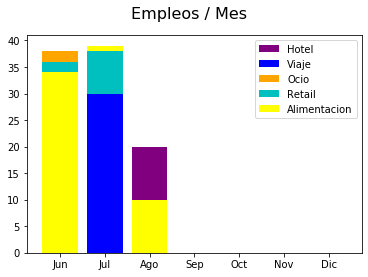

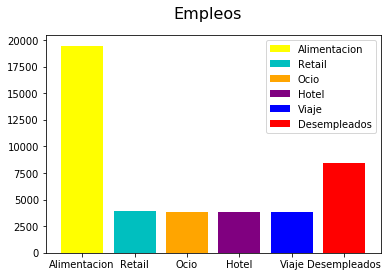

In [76]:
fig,ax=pp.subplots()

fig.suptitle('Empleos / Mes', fontsize=16)

ax.bar('Jun',sum(hotelJ),label='Hotel',color='purple')
ax.bar('Jun',sum(viajeJ),label='Viaje',color='blue')
ax.bar('Jun',sum(ocioJ),label='Ocio',color='orange')
ax.bar('Jun',sum(retailJ),label='Retail',color='c')
ax.bar('Jun',sum(alimentacionJ),label='Alimentacion',color='yellow')


ax.bar('Jul',sum(alimentacionJu),label='',color='yellow')
ax.bar('Jul',sum(hotelJu),label='',color='purple')
ax.bar('Jul',sum(retailJu),label='',color='c')
ax.bar('Jul',sum(ocioJu),label='',color='orange')
ax.bar('Jul',sum(viajeJu),label='',color='blue')

ax.bar('Ago',sum(retailA),label='',color='c')
ax.bar('Ago',sum(hotelA),label='',color='purple')
ax.bar('Ago',sum(alimentacionA),label='',color='yellow')
ax.bar('Ago',sum(viajeA),label='',color='blue')
ax.bar('Ago',sum(ocioA),label='',color='orange')

ax.bar('Sep',sum(alimentacionS),label='',color='yellow')
ax.bar('Sep',sum(retailS),label='',color='c')
ax.bar('Sep',sum(ocioS),label='',color='orange')
ax.bar('Sep',sum(hotelS),label='',color='purple')
ax.bar('Sep',sum(viajeS),label='',color='blue')

ax.bar('Oct',sum(alimentacionO),label='',color='yellow')
ax.bar('Oct',sum(retailO),label='',color='c')
ax.bar('Oct',sum(ocioO),label='',color='orange')
ax.bar('Oct',sum(hotelO),label='',color='purple')
ax.bar('Oct',sum(viajeO),label='',color='blue')

ax.bar('Nov',sum(alimentacionN),label='',color='yellow')
ax.bar('Nov',sum(retailN),label='',color='c')
ax.bar('Nov',sum(ocioN),label='',color='orange')
ax.bar('Nov',sum(hotelN),label='',color='purple')
ax.bar('Nov',sum(viajeN),label='',color='blue')

ax.bar('Dic',sum(alimentacionD),label='',color='yellow')
ax.bar('Dic',sum(retailD),label='',color='c')
ax.bar('Dic',sum(ocioD),label='',color='orange')
ax.bar('Dic',sum(hotelD),label='',color='purple')
ax.bar('Dic',sum(viajeD),label='',color='blue')

ax.legend()

fig,ax=pp.subplots()

fig.suptitle('Empleos', fontsize=16)

ax.bar('Alimentacion',sum(alimentacion.values()),label='Alimentacion',color='yellow')
ax.bar('Retail',sum(retail.values()),label='Retail',color='c')
ax.bar('Ocio',sum(ocio.values()),label='Ocio',color='orange')
ax.bar('Hotel',sum(hotel.values()),label='Hotel',color='purple')
ax.bar('Viaje',sum(viaje.values()),label='Viaje',color='blue')
ax.bar('Desempleados',sum(desempleadas.values()),label='Desempleados',color='red')

ax.legend()



* Al solo simular 210 días, no se puede asignar más empleos. En caso de simular más días se apreciaría en la gráfica en los meses a partir de Agosto.